In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=14)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [8]:
train_target = pd.read_csv('../scenario_gender/data/gender_train.csv')
train_target.head(5)

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [9]:
df_vectors = pd.read_pickle('../scenario_gender/data/mles_embeddings.pickle').set_index('customer_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('customer_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v247,v248,v249,v250,v251,v252,v253,v254,v255,gender
customer_id,,,,,,,,,,,,,,,,,,,,,
28753,0.032628,0.023524,0.096102,0.075536,-0.028560,0.036620,-0.040889,-0.020411,0.066585,-0.049987,...,-0.069258,-0.106642,-0.074697,0.115729,-0.081120,-0.063137,-0.024479,-0.110509,0.072381,0
1510234,0.051031,-0.012670,0.084141,0.040444,0.010896,0.065011,-0.115732,-0.017938,0.067514,0.004782,...,-0.070534,-0.050557,-0.059048,0.092528,-0.073792,-0.017794,-0.006092,-0.118974,-0.045036,0
1877899,0.017448,0.086413,0.069863,0.041326,0.022505,0.046280,-0.082103,-0.063644,0.014243,0.026372,...,-0.016126,0.048640,-0.042739,0.107163,-0.074116,-0.033887,0.022292,-0.156909,-0.011240,1
2338817,-0.002752,-0.008651,0.111928,0.113773,0.027360,0.044054,-0.010186,-0.074205,0.051082,-0.088483,...,-0.037561,-0.057594,-0.060117,0.112788,-0.079773,-0.057828,-0.011963,-0.122711,0.076927,1
2635248,-0.030533,0.003947,0.093150,0.094497,0.051655,0.064462,-0.013817,0.075686,0.051116,0.059806,...,-0.043641,-0.008191,-0.068231,0.074752,-0.078519,-0.041190,0.015039,-0.098128,0.027076,0


In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
df_pca = df_vectors.copy()

In [12]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.711679

In [13]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]


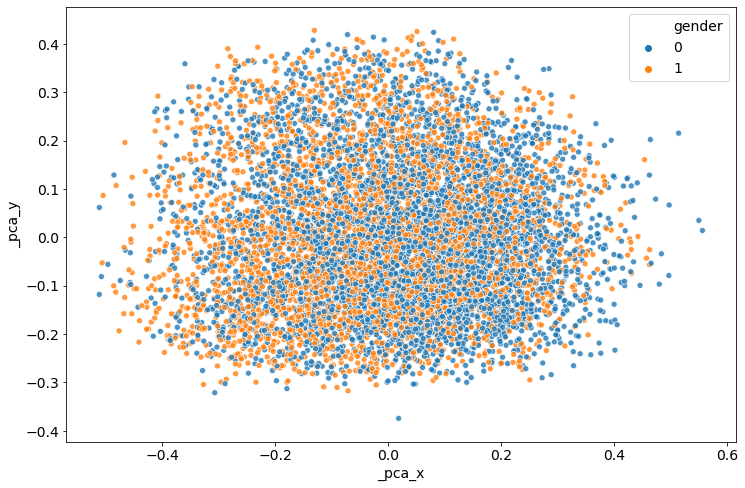

In [14]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='gender',
    # style='bins',
    data=df_pca,
    palette='tab10',
    alpha=0.8,
    ax=axs
)
plt.show()

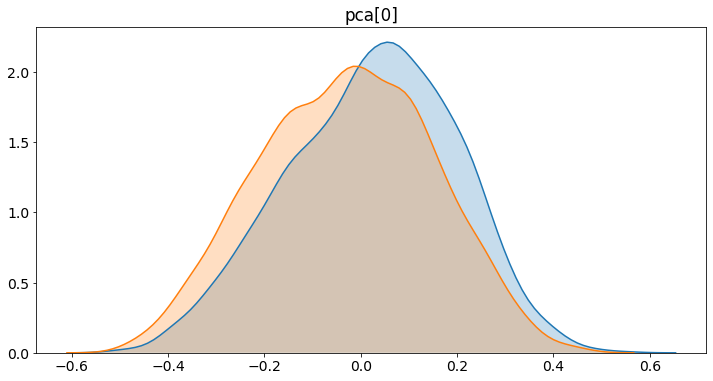

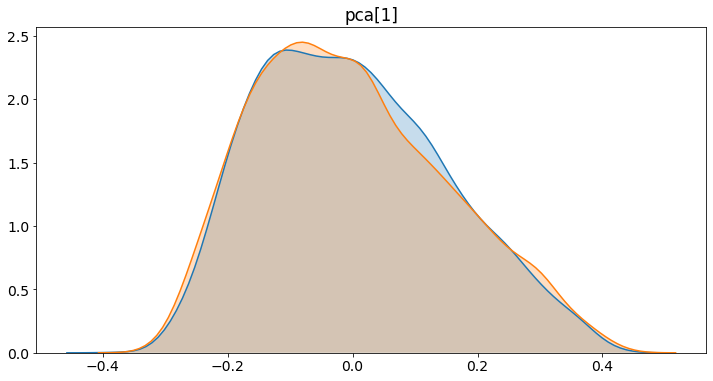

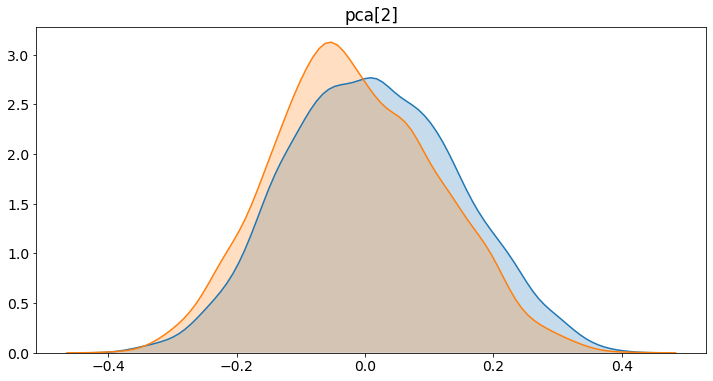

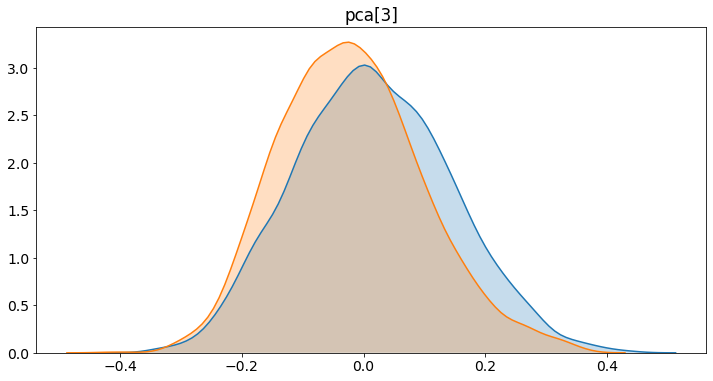

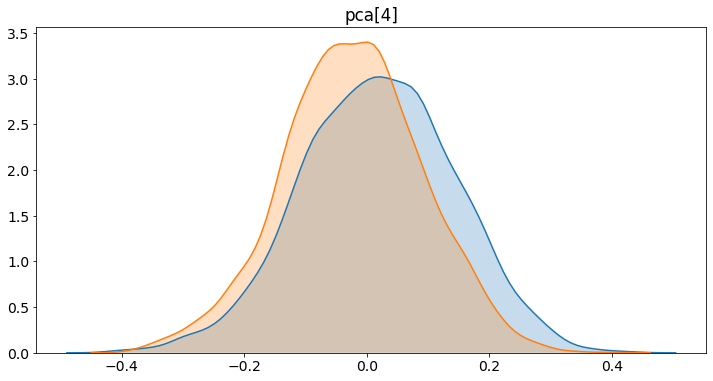

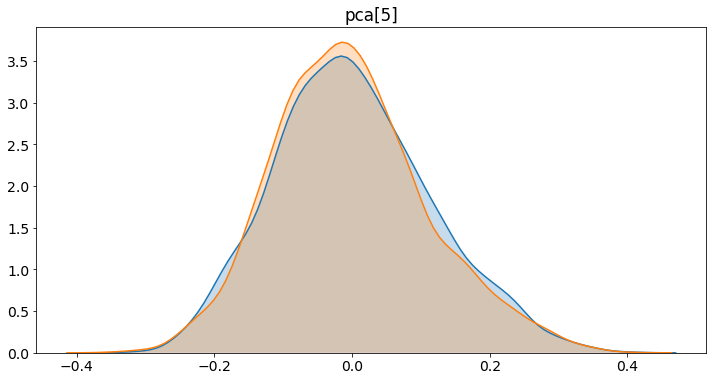

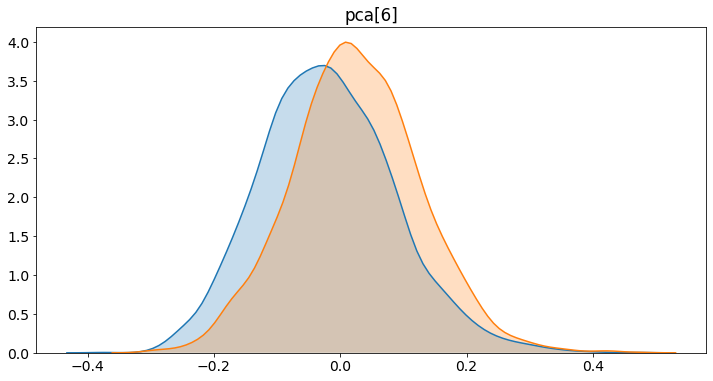

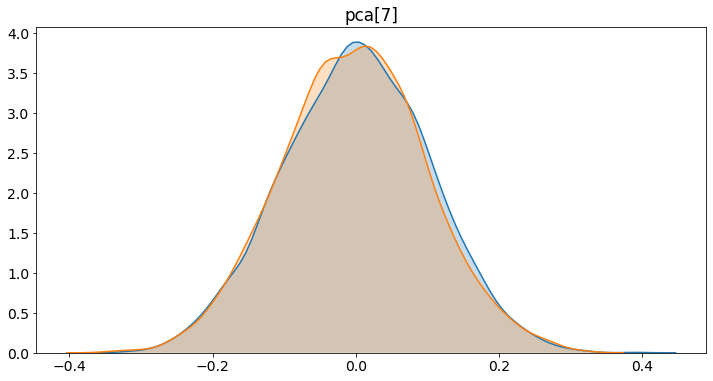

In [15]:
for i in range(8):
    plt.figure(figsize=(12,6))

    for b in [0, 1]:
        ix = np.arange(len(pca_results))[df_pca['gender'].eq(b)]
        sns.kdeplot(pca_results[ix, i], shade=True)
    plt.title(f'pca[{i}]')
    plt.show()

In [16]:
if len(df_pca) > 10000:
    df_tsne = df_pca.sample(n=10000).copy()
else:
    df_tsne = df_pca.copy()

In [17]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8400 samples in 0.212s...
[t-SNE] Computed neighbors for 8400 samples in 30.912s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8400
[t-SNE] Computed conditional probabilities for sample 2000 / 8400
[t-SNE] Computed conditional probabilities for sample 3000 / 8400
[t-SNE] Computed conditional probabilities for sample 4000 / 8400
[t-SNE] Computed conditional probabilities for sample 5000 / 8400
[t-SNE] Computed conditional probabilities for sample 6000 / 8400
[t-SNE] Computed conditional probabilities for sample 7000 / 8400
[t-SNE] Computed conditional probabilities for sample 8000 / 8400
[t-SNE] Computed conditional probabilities for sample 8400 / 8400
[t-SNE] Mean sigma: 0.173586
[t-SNE] KL divergence after 50 iterations with early exaggeration: 95.896942
[t-SNE] KL divergence after 300 iterations: 3.361283


In [18]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

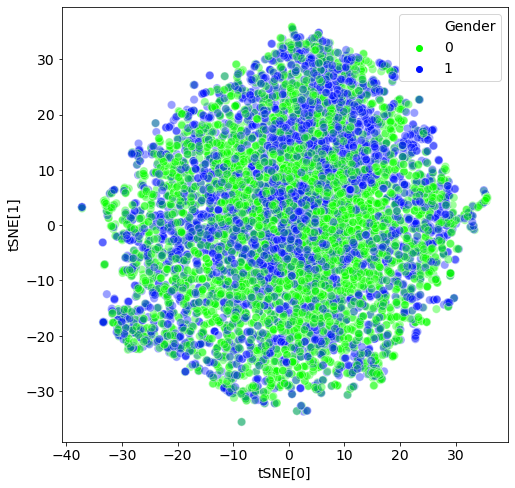

In [20]:
_, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='Gender',
    data=df_tsne.rename(columns={'gender': 'Gender'}),
    palette='hsv',
    alpha=0.4, s=70,
    ax=axs,
)
# plt.show()

plt.savefig('gender-tsne.pdf')